In [1]:
import sys
sys.path.append("/Users/lz371/Desktop/lib/")
sys.path.append("/Users/lz371/Desktop/lib/meta")
sys.path.append("/usr/local/Cellar/graph-tool/2.40/lib/python3.9/site-packages")
sys.path.append("/usr/local/lib/python3.9/site-packages")
import graph_tool.all as gt
import numpy as np
import bp_dcppm
import time
import random

In [2]:
nr = 100
B = 2
k = 5
ep = 0.9
N = nr*B

p_in = (1+(B-1)*ep)*k/N
p_out= (1 - ep)*k/N

ers = np.zeros((B,B))
for r in range(B):
    for s in range(B):
        if r == s:
            ers[r,s] = nr*nr*p_in
        else:
            ers[r,s] = nr*nr*p_out
            
b = []
for r in range(B):
    b += [r for u in range(nr)]
g = gt.generate_sbm(b, ers)
# gt.remove_parallel_edges(g)
# gt.remove_self_loops(g)

g.vp.b = g.new_vp("int", b)
pos = gt.sfdp_layout(g)

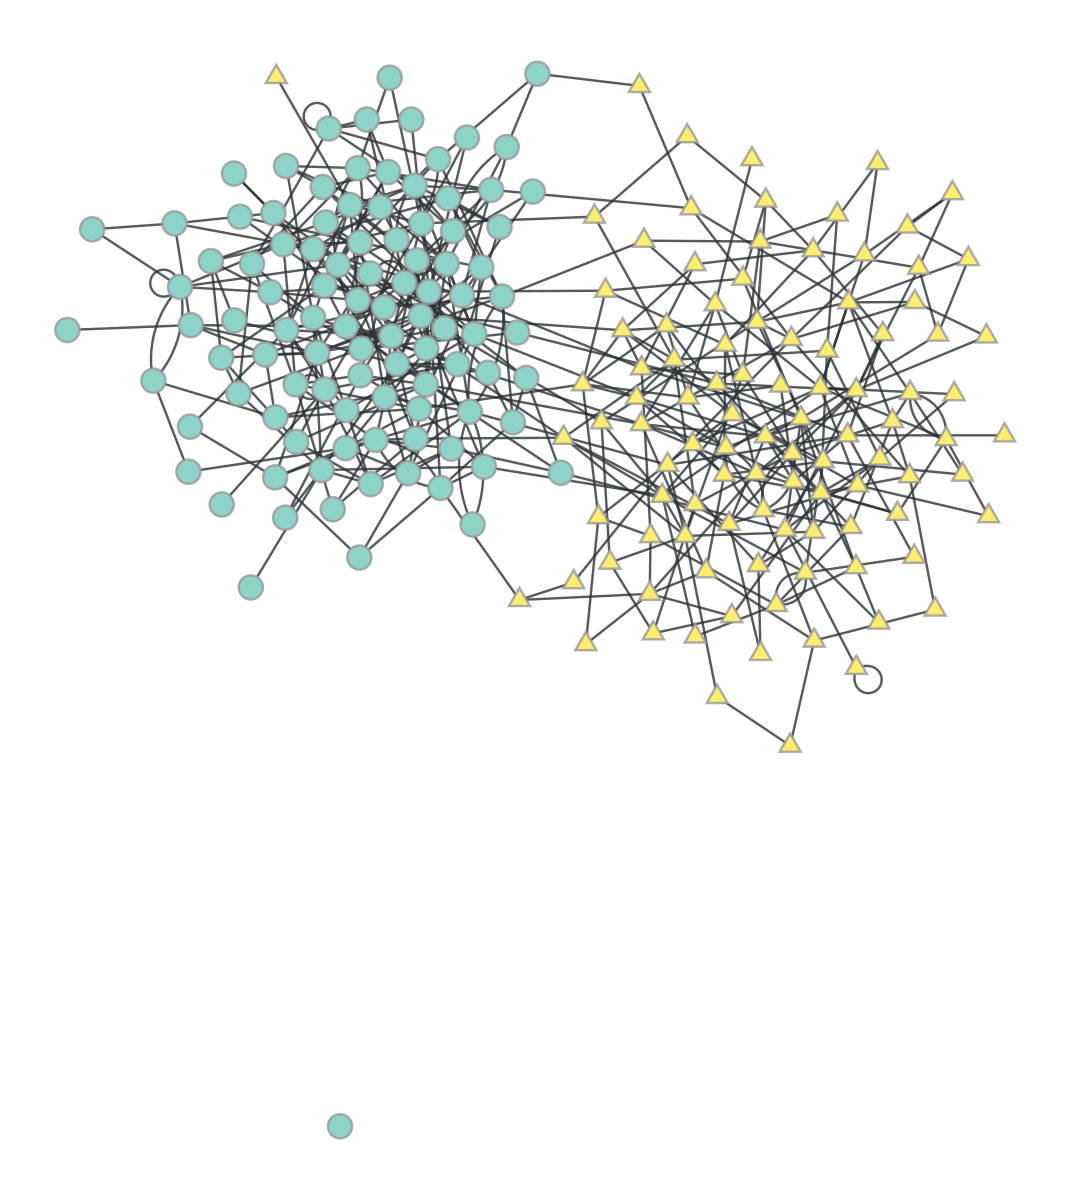

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x152f2ef70, at 0x152f49640>

In [3]:
gt.graph_draw(g, vertex_fill_color = g.vp.b, vertex_shape = g.vp.b, pos = pos)

In [4]:
state_gt = gt.EMBlockState(g, B)

tic = time.time()
state_gt.e_iter(max_iter = 1)
toc = time.time()
print(f"Elapsed time {round(toc - tic,5)}")

Elapsed time 0.00092


In [16]:
state = bp_dcppm.EM_DCPPM(g, B = 2, lrs = ers)

b_est = []
for e, vm in state.vm.items():
    b_est.append(np.argmax(state.vm[e]))
    
gt.partition_overlap(np.array(b), np.array(b_est))

0.535

In [17]:
tic = time.time()
state.bp_iter(max_niter = 100, verbose = True)
toc = time.time()

3.6846676515825885e-06 9


In [18]:
print(f"Elapsed time {round(toc - tic,5)}")

Elapsed time 21.6164


In [19]:
b_est = []
for e, vm in state.vm.items():
    b_est.append(np.argmax(state.vm[e]))
    
gt.partition_overlap(np.array(b), np.array(b_est))

0.99